# CA1: Data Analysis with Numpy and Matplotlib


###### Name: Andrew Dillon Poh Jie Hao
###### Admin No.: 2227168
###### Class: EP0302/04
###### Problem Statement: Which university and degree should a student pick?

# Report Title: Factors for picking a University and Degree


I will be using scenario to add some structure to my analysis.
### Scenario:
A male student who wants to enroll in a unversity, but does not know which university or degree to choose. The student does not have any particular interests, but wants guaranteed employment with the highest possible pay. He is slightly worried about not being able to graduate as his performance in school is slightly above average with a GPA of around 3.6.

The student want to pick a university and degree that offers me the best prospects when I graduate. As such, my overarching problem statement is: Which university and degree should a student pick? This report will answer this by splitting the problem statement into 2 key questions:

**1. Which university and degree graduates have the best immediate career prospects?**
- Areas of analysis include pay and employment

**2. Which universities and degrees are realistic based on a student's ability/preferences?**
- Areas of analysis include past graduation rates, popularity of courses and difficulty of enrolling

I will be using 4 datasets
1. Graduate Employment Survey - NTU, NUS, SIT, SMU, SUSS & SUTD (ges.csv) 
https://beta.data.gov.sg/collections/415/view
2. Intake, Enrolment and Graduates by Institutions (IntakeByInstitution.csv and GraduatesByInstitution.csv)
https://beta.data.gov.sg/collections/452/view
3. Universities - Intake, Enrolment and Graduates by Course (UniversitiesIntakeEnrolmentandGraduatesbyCourse.csv)
https://beta.data.gov.sg/collections/443/view
4. NUS Indicative Grade Profile (NUSigp.csv)
https://docs.google.com/spreadsheets/d/1MPEDZpw26TjN7dTsQzsbnXHZa47og0qSrdHrlT7nLKc/pubhtml#

**This report will first briefly introduce the 4 datasets used, followed by 6 analyses using graphs and finally a compilation of the analyses and recommendations.**

In [1]:
#  Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

# Dataset 1: Graduate Employment Survey

In [5]:
# Graduate Employment Survey Dataset
# https://beta.data.gov.sg/collections/415/view
file = './data/ges.csv'
d1=np.genfromtxt(file,
                   delimiter=',',
                   names=True,
                   dtype=(int,'U50','U70','U90',float,int,int,int,int,int,int),
                   usecols=(0,1,2,3,4,6,7,8,9,10,11),
                   missing_values=['na','-',''],
                   filling_values=0,
                   comments=None)
# Remove the * and ^ characters as well as trailing whitespace which occurs after removing them
d1['degree'] = np.char.replace(d1['degree'], '*', '')
d1['degree'] = np.char.replace(d1['degree'], '^', '')
d1['degree'] = np.char.replace(d1['degree'], '&', 'and')
d1['degree'] = np.char.strip(d1['degree'])

# Standardise university names as capital abbreviations (i.e. SUSS, SIT, NUS etc.)
for i in range(len(d1)):
    if d1[i]['university'] == 'Singapore University of Social Sciences':
        d1[i]['university'] = 'SUSS'
    elif d1[i]['university'] == 'Singapore Institute of Technology':
        d1[i]['university'] = 'SIT'
    elif d1[i]['university'] == 'National University of Singapore':
        d1[i]['university'] = 'NUS'
    elif d1[i]['university'] == 'Singapore Management University':
        d1[i]['university'] = 'SMU'
    elif d1[i]['university'] == 'Nanyang Technological University':
        d1[i]['university'] = 'NTU'
    elif d1[i]['university'] == 'Singapore University of Technology and Design':
        d1[i]['university'] = 'SUTD'
        
print("In terms of data processing, I have removed the *, ^ and trailing whitespace characters for all the degree names as some years contain these characters while others don't, making it inconsistent. I have also renamed the universities as their abbreviated names for easier coding.")

In terms of data processing, I have removed the *, ^ and trailing whitespace characters for all the degree names as some years contain these characters while others don't, making it inconsistent. I have also renamed the universities as their abbreviated names for easier coding.


In [3]:
ges_title = ' Graduate Employment Survey '
title_len = len(ges_title) + 6
print('{:*^{}}'.format(ges_title, title_len)+'\n')


# *** General Dataset Information ***
print('This dataset contains employment and wage information about graduates from different universities and degree programmes across mulitple years.')

# Years spanned
years = np.unique(d1['year'])
print(f'The data is from the years {min(years)} to {max(years)}') 

# Universities included
universities = np.unique(d1['university'])
print(f'The {len(universities)} universities surveyed were ', end='')
for i in range(len(universities)):
    if i > len(universities)-2: # adds 'and' before the last university
        print(' and ', end='')
    print(universities[i], end='')
    if i < len(universities)-2: # adds ',' between all universities except the last 2
        print(', ', end='')
print()

# Rows and cols
print(f'There are {len(d1)} rows and {len(d1[0])} columns in this dataset')
print()
print('The columns names are: ')
for i in range(len(d1.dtype.names)):
    print(f' - {d1.dtype.names[i]:27s} <class {d1.dtype[i]}> with {len(np.unique(d1[d1.dtype.names[i]]))} unique values')
print()
print('*The report will exclude the column employment_rt_ft_perm and will only use employment_rate_overall for employment rate')
print()

ntu_rows = np.where(d1['university'] == 'NTU')[0]
nus_rows = np.where(d1['university'] == 'NUS')[0]
sit_rows = np.where(d1['university'] == 'SIT')[0]
smu_rows = np.where(d1['university'] == 'SMU')[0]
suss_rows = np.where(d1['university'] == 'SUSS')[0]
sutd_rows = np.where(d1['university'] == 'SUTD')[0]
print('The following are the total number of rows per school (i.e. total degrees per school across all years):')
print(f' - NTU: {len(ntu_rows)}\n - NUS: {len(nus_rows)}\n - SIT: {len(sit_rows)}\n - SMU: {len(smu_rows)}\n - SUSS: {len(suss_rows)}\n - SUTD: {len(sutd_rows)}\n')

# View top 5 rows
top_5_rows = np.copy(d1[:5])
for i in range(len(top_5_rows)): # shorten the 'school' and 'degree' columns because it looks ugly if they're too long
    top_5_rows[i]['school'] = top_5_rows[i]['school'][:22] + '...'
    top_5_rows[i]['degree'] = top_5_rows[i]['degree'][:21] + '...'
print(f'First 5 rows of the dataset:\n{top_5_rows}\n')


# *** Overall Employment Rate Statistics ***
# Max employment rate
max_employment_rate = np.max(d1['employment_rate_overall'])
max_employment_courses = np.argwhere(d1['employment_rate_overall']==np.max(d1['employment_rate_overall']))
print(f'The highest overall employment rate was {max_employment_rate}% which was achieved by {len(max_employment_courses)} courses')

employment_rate_nonzero = d1[np.nonzero(d1['employment_rate_overall'])]

# Min employment rate
min_employment_rate = np.min(employment_rate_nonzero['employment_rate_overall'])
min_employment_index = np.argmin(employment_rate_nonzero['employment_rate_overall'])
min_employment_row = employment_rate_nonzero[min_employment_index]
min_employment_year = min_employment_row['year']
min_employment_uni = min_employment_row['university']
min_employment_degree = min_employment_row['degree']
print(f'The lowest overall employment rate was {min_employment_rate}% from {min_employment_uni} {min_employment_degree} in {min_employment_year}')

# Standard Deviation and Variance of the employment rate
std_employment = np.std(employment_rate_nonzero['employment_rate_overall'])
var_employment = np.var(employment_rate_nonzero['employment_rate_overall'])
print(f'The standard deviation of overall employment rate was {std_employment:.2f}')
print(f'The variance of overall employment rate was {var_employment:.2f}')
print()


# *** Median Gross Monthly Salary Statistics ***
# Max median salary
max_median = np.max(d1['gross_monthly_median'])
max_median_index = np.argmax(d1['gross_monthly_median'])
max_median_row = d1[max_median_index]
max_median_year = max_median_row['year']
max_median_uni = max_median_row['university']
max_median_degree = max_median_row['degree']
print(f'The highest gross monthly median was ${max_median} from {max_median_degree} in {max_median_uni} ({max_median_year})')

median_nonzero = d1[np.nonzero(d1['gross_monthly_median'])]

# Min median salary
min_median_index = np.argmin(median_nonzero['gross_monthly_median'])
min_median = np.min(median_nonzero['gross_monthly_median'])
min_median_row = median_nonzero[min_median_index]
min_median_year = min_median_row['year']
min_median_uni = min_median_row['university']
min_median_degree = min_median_row['degree']
print(f'The lowest gross monthly median was ${min_median} from {min_median_degree} in {min_median_uni} ({min_median_year})')

# Standard Deviation of Gross Monthly Median
std_median = np.std(median_nonzero['gross_monthly_median'])
var_median = np.var(median_nonzero['gross_monthly_median'])
print(f'The standard deviation of the gross monthly median is {std_median:.2f}')


*** Graduate Employment Survey ***

This dataset contains employment and wage information about graduates from different universities and degree programmes across mulitple years.
The data is from the years 2013 to 2021
The 6 universities surveyed were NTU, NUS, SIT, SMU, SUSS and SUTD
There are 1121 rows and 11 columns in this dataset

The columns names are: 
 - year                        <class int32> with 9 unique values
 - university                  <class <U50> with 6 unique values
 - school                      <class <U70> with 68 unique values
 - degree                      <class <U90> with 270 unique values
 - employment_rate_overall     <class float64> with 226 unique values
 - basic_monthly_mean          <class int32> with 798 unique values
 - basic_monthly_median        <class int32> with 182 unique values
 - gross_monthly_mean          <class int32> with 796 unique values
 - gross_monthly_median        <class int32> with 237 unique values
 - gross_mthly_25_percentile   <

# Dataset 2: Intake and Graduates by Institution

In [4]:
# Intake and Graduates by Institution Dataset
# https://beta.data.gov.sg/collections/443/view

# Intake File
file = './data/IntakebyInstitutions.csv'
d2a=np.genfromtxt(file,
                   delimiter=',',
                   names='year, sex, NUS, NTU, SMU, SIT, SUTD, SUSS',
                   dtype=(int,'U2',int,int,int,int,int,int),
                   usecols=(0,1,2,3,4,5,6,7),
                   missing_values=['na','-',''],
                   filling_values=0,
                   comments=None)

# Graduates file
file = './data/GraduatesbyInstitutions.csv'
d2b=np.genfromtxt(file,
                   delimiter=',',
                   names='year, sex, NUS, NTU, SMU, SIT, SUTD, SUSS',
                   dtype=(int,'U2',int,int,int,int,int,int),
                   usecols=(0,1,2,3,4,5,6,7),
                   missing_values=['na','-',''],
                   filling_values=0,
                   comments=None)

# Find earliest year that all unis intake started
cols = ['NUS', 'NTU', 'SMU', 'SIT', 'SUTD', 'SUSS'] # only look at intake because intake comes before graduation
latest_index = 0

for col in cols:
    this_index = np.nonzero(d2a[col])[0][0]
    if this_index > latest_index:
        latest_index = this_index

earliest_year = d2a[latest_index]['year']

# Filter d2a to only contain data from the earliest year that all universities started intake
d2a = d2a[np.logical_and(d2a['year']>=earliest_year,d2a['year']<=2021)]
d2b = d2b[np.logical_and(d2b['year']>=earliest_year,d2b['year']<=2021)]

print('This dataset is a combination of 2 sheets.')
print("In terms of dataset processing, I have subsetted the data to only contain data from 2014 onwwards as the earliest year that all universities started intake is in 2014.")

This dataset is a combination of 2 sheets.
In terms of dataset processing, I have subsetted the data to only contain data from 2014 onwwards as the earliest year that all universities started intake is in 2014.


In [5]:
title = ' Intake and Graduates '
title_len = len(title) + 6
print('{:*^{}}'.format(title, title_len)+'\n')

# *** General Dataset Information ***
print('The dataset is a combination of IntakebyInstitutions.csv and GraduatesbyInstitutions.csv')
print('The dataset contains the intake and graduate numbers of univerities and polytechnics across multiple years')
print()
# Years spanned
years = np.unique(d2a['year'])
print(f'The dataset has been subsetted to contain data from the years {min(years)} to {max(years)}') 
print(f'The dataset includes the same Universities as the GES')

# Rows and cols
print(f'In this dataset, there are {len(d2a)} rows and {len(d2a[0])} columns from IntakebyInstitutions.csv and {len(d2b)} rows and {len(d2b[0])} columns from GraduatesbyInstitutions.csv')
print()
print('The columns names are the same for both sheets in the dataset: ')
for i in range(len(d2a.dtype.names)):
    print(f' - {d2a.dtype.names[i]:11s} <class {d2a.dtype[i]}> with {len(np.unique(d2a[d2a.dtype.names[i]]))} unique values')
print()

# View top 5 rows
top_5_rows_a = np.copy(d2a[:5])
print(f'First 5 rows of the IntakebyInstitutions.csv:\n{top_5_rows_a}\n')
top_5_rows_b = np.copy(d2b[:5])
print(f'First 5 rows of the GraduatesbyInstitutions.csv:\n{top_5_rows_b}\n')

# *** Statistics ***
# Function to find max intake and graduation
def find_max(array, sheet):
    highest = 0
    for col in array:
        this = np.max(sheet[col])
        if this > highest:
            highest = this
            uni = col
            index = np.where(sheet[col] == highest)
            year = sheet[index]['year']
            
    return highest, uni, year[0]

# Function to find min intake and graduation
def find_min(array, sheet):
    lowest = 99999999
    for col in array:
        this = np.min(sheet[col])
        if this < lowest:
            lowest = this
            uni = col
            index = np.where(sheet[col] == lowest)
            year = sheet[index]['year']
            
    return lowest, uni, year[0]

cols = ['NUS', 'NTU', 'SMU', 'SIT', 'SUTD', 'SUSS']
# Highest intake
highest_in_value, highest_in_uni, highest_in_year = find_max(cols, d2a)
print(f'The highest intake was {highest_in_value} from {highest_in_uni} in {highest_in_year}')
# Lowest intake
lowest_in_value, lowest_in_uni, lowest_in_year = find_min(cols, d2a)
print(f'The lowest intake was {lowest_in_value} from {lowest_in_uni} in {lowest_in_year}')
# Highest graduates
highest_grad_value, highest_grad_uni, highest_grad_year = find_max(cols, d2b)
print(f'The highest graduate number was {highest_grad_value} from {highest_grad_uni} in {highest_grad_year}')
# Lowest graduates
lowest_grad_value, lowest_grad_uni, lowest_grad_year = find_min(cols, d2b[d2b['year']>=2018]) # filter d2b > 2018 in this case because graduates for all Unis only started after 2018
print(f'The lowest graduate number was {lowest_grad_value} from {lowest_grad_uni} in {lowest_grad_year}')

*** Intake and Graduates ***

The dataset is a combination of IntakebyInstitutions.csv and GraduatesbyInstitutions.csv
The dataset contains the intake and graduate numbers of univerities and polytechnics across multiple years

The dataset has been subsetted to contain data from the years 2014 to 2021
The dataset includes the same Universities as the GES
In this dataset, there are 16 rows and 8 columns from IntakebyInstitutions.csv and 16 rows and 8 columns from GraduatesbyInstitutions.csv

The columns names are the same for both sheets in the dataset: 
 - year        <class int32> with 8 unique values
 - sex         <class <U2> with 2 unique values
 - NUS         <class int32> with 16 unique values
 - NTU         <class int32> with 16 unique values
 - SMU         <class int32> with 16 unique values
 - SIT         <class int32> with 16 unique values
 - SUTD        <class int32> with 16 unique values
 - SUSS        <class int32> with 16 unique values

First 5 rows of the IntakebyInstitut

# Dataset 3: Universities - Intake, Enrolment and Graduates by Course

In [6]:
# Universities - Intake, Enrolment and Graduates by Course Dataset
# https://beta.data.gov.sg/collections/443/view
file = './data/UniversitiesIntakeEnrolmentandGraduatesbyCourse.csv'
d3=np.genfromtxt(file,
                   delimiter=',',
                   dtype=(int, 'U4', 'U50',int,int,int),
                   missing_values=['na','-',''],
                   filling_values=0,
                   names=True,
                   comments=None,
                encoding='utf-8-sig')

# Subset d3 to only be year 2021
d3 = d3[d3['year'] == 2021]

print('In terms of processing the dataset, I have subsetted the data to only be the year 2021 as I will only be using 1 year an 2021 is the latest year which makes it more relevant to today.')

In terms of processing the dataset, I have subsetted the data to only be the year 2021 as I will only be using 1 year an 2021 is the latest year which makes it more relevant to today.


In [7]:
title = ' Intake, Enrolment and Graduates by Course '
title_len = len(title) + 6
print('{:*^{}}'.format(title, title_len)+'\n')

# *** General Dataset Information ***
print("This dataset shows the intake, enrolment and graduate numbers for each course across Singapore's universities.")
# Rows and cols
print(f'There are {len(d3)} rows and {len(d3[0])} columns in this dataset')
print()
print('The columns names are: ')
for i in range(len(d3.dtype.names)):
    print(f' - {d3.dtype.names[i]:8s} <class {d3.dtype[i]}> with {len(np.unique(d3[d3.dtype.names[i]]))} unique values')
print()

# View top 5 rows
top_5_rows = np.copy(d3[:5])
print(f'First 5 rows of the dataset:\n{top_5_rows}\n')

# *** Statistics ***
# Function to find max
def find_max2(arr):
    highest = np.max(arr.tolist())
    index = np.argmax(arr.tolist())
    course = d3[index]['course']
            
    return highest, course

# Function to find min
def find_min2(arr):
    lowest = np.min(arr.tolist())
    index = np.argmin(arr.tolist())
    course = d3[index]['course']
            
    return lowest, course

# Group courses by gender
d3_mf = np.array(d3[d3['sex'] == 'MF'].tolist())[:,3:]
d3_mf = d3_mf.astype('int')
d3_f = np.array(d3[d3['sex'] == 'F'].tolist())[:,3:]
d3_f = d3_f.astype('int')
d3_m = d3_mf - d3_f
# Show dataset stats
def bycourse_stats():
    cols = ['male', 'female', 'male and female']
    for col in cols: 
        if col == 'male':
            arr = d3_m
        elif col == 'female':
            arr = d3_f
        elif col == 'male and female':
            arr = d3_mf
        highest, highest_course = find_max2(arr)
        print(f'The highest enrolment was of {col} students was {highest} from {highest_course}')
        lowest, lowest_course = find_min2(arr)
        print(f'The lowest enrolment was of {col} students was {lowest} from {lowest_course}')
        
bycourse_stats()

*** Intake, Enrolment and Graduates by Course ***

This dataset shows the intake, enrolment and graduate numbers for each course across Singapore's universities.
There are 30 rows and 6 columns in this dataset

The columns names are: 
 - year     <class int32> with 1 unique values
 - sex      <class <U4> with 2 unique values
 - course   <class <U50> with 15 unique values
 - intake   <class int32> with 30 unique values
 - enrolment <class int32> with 30 unique values
 - graduates <class int32> with 30 unique values

First 5 rows of the dataset:
[(2021, 'MF', 'Accountancy', 1356,  4859, 1355)
 (2021, 'F', 'Accountancy',  757,  2726,  732)
 (2021, 'MF', 'Architecture  Building & Real Estate',  430,  1964,  458)
 (2021, 'F', 'Architecture  Building & Real Estate',  255,  1171,  247)
 (2021, 'MF', 'Business & Administration', 3483, 12228, 2378)]

The highest enrolment was of male students was 13112 from Humanities & Social Sciences
The lowest enrolment was of male students was 16 from Educa

# Dataset 4: NUS Indicative Grade Profile (IGP)


In [8]:
# NUS IGP Dataset
file = './data/NUSigp.csv'
d4=np.genfromtxt(file,
                   delimiter=',',
                   dtype=('U50',float,float),
                   missing_values=['#'],
                   filling_values=0,
                   usecols=(0,1,2),
                   names=True,
                   comments=None,
                encoding='utf-8-sig')

# Remove '*' and '^' characters as well as trailing whitespace
d4['Degree'] = np.char.replace(d4['Degree'], '*', '')
d4['Degree'] = np.char.replace(d4['Degree'], '^', '')
d4['Degree'] = np.char.strip(d4['Degree'])
# Remove rows where IGP is blank
blank_igp = np.where(d4['10th_percentile']== 0)
for i in range(len(blank_igp)):
    d4 = np.delete(d4,blank_igp)

print('In terms of processing the dataset, I have removed the *, ^ and trailing whitespace characters to make the degree names consistent throughout. I have also removed the years where the IGP is marked as "#" to make eliminate the 0 values during the analysis.')

In terms of processing the dataset, I have removed the *, ^ and trailing whitespace characters to make the degree names consistent throughout. I have also removed the years where the IGP is marked as "#" to make eliminate the 0 values during the analysis.


In [9]:
title = ' NUS Indicative Grade Profile '
title_len = len(title) + 6
print('{:*^{}}'.format(title, title_len)+'\n')

# *** General Dataset Information ***
print('This dataset shows Indicative Grade Profile (IGP) for each degree programme that NUS offers.')
print('IGP is a representative grade profile of the 10th and 90th percentiles of applicants offered places in AY 2023/2024. This dataset will only include the IGP for polytechnics (GPA).')
print('I will be using the IGP of year 2017 as the batch of 2017 will graduate in 2021 which is the latest year in the GES sheet.')
# Rows and cols
print(f'There are {len(d4)} rows and {len(d4[0])} columns in this dataset')
print()
print('The columns names are: ')
for i in range(len(d4.dtype.names)):
    print(f' - {d4.dtype.names[i]:8s} <class {d4.dtype[i]}> with {len(np.unique(d4[d4.dtype.names[i]]))} unique values')
print()

# View top 5 rows
top_5_rows = np.copy(d4[:5])
print(f'First 5 rows of the dataset:\n{top_5_rows}\n')

# *** Statistics ***
# Function to find max
def max_igp(arr):
    highest = np.max(arr.tolist())
    index = np.argmax(arr.tolist())
    degree = d4[index]['Degree']
            
    return highest, degree

# Function to find min
def min_igp(arr):
    lowest = np.min(arr.tolist())
    index = np.argmin(arr.tolist())
    degree = d4[index]['Degree']
            
    return lowest, degree

# Show dataset stats
pctile_10 = d4['10th_percentile']

def igp_stats():    
    highest_10th_value, highest_10th_degree = max_igp(pctile_10)
    print(f'The highest 10th percentile IGP is {highest_10th_value} from {highest_10th_degree}')
    
    lowest_10th_value, lowest_10th_degree = min_igp(pctile_10)
    print(f'The lowest 10th percentile IGP is {lowest_10th_value} from {lowest_10th_degree}')
    
igp_stats()

*** NUS Indicative Grade Profile ***

This dataset shows Indicative Grade Profile (IGP) for each degree programme that NUS offers.
IGP is a representative grade profile of the 10th and 90th percentiles of applicants offered places in AY 2023/2024. This dataset will only include the IGP for polytechnics (GPA).
I will be using the IGP of year 2017 as the batch of 2017 will graduate in 2021 which is the latest year in the GES sheet.
There are 26 rows and 3 columns in this dataset

The columns names are: 
 - Degree   <class <U50> with 26 unique values
 - 10th_percentile <class float64> with 21 unique values
 - old_10th_percentile <class float64> with 20 unique values

First 5 rows of the dataset:
[('Law', 3.81, 3.86) ('Medicine', 3.89, 3.94) ('Nursing', 3.25, 3.33)
 ('Architecture', 3.45, 3.59) ('Industrial Design', 3.54, 3.88)]

The highest 10th percentile IGP is 3.9 from Pharmacy
The lowest 10th percentile IGP is 3.25 from Nursing


# Analysis 1: Spread of Gross Monthly Median by University (Boxplot)
_Dataset: Graduate Employment Survey_

Now that we have a better understanding of the dataset, we can do a general exploratory data analysis to visualise the data. 
I would like to investigate how graduate wages compare across the universities. As such, I created a boxplot to get a quick summary of gross median wages of graduates from degrees across all the universities and years.

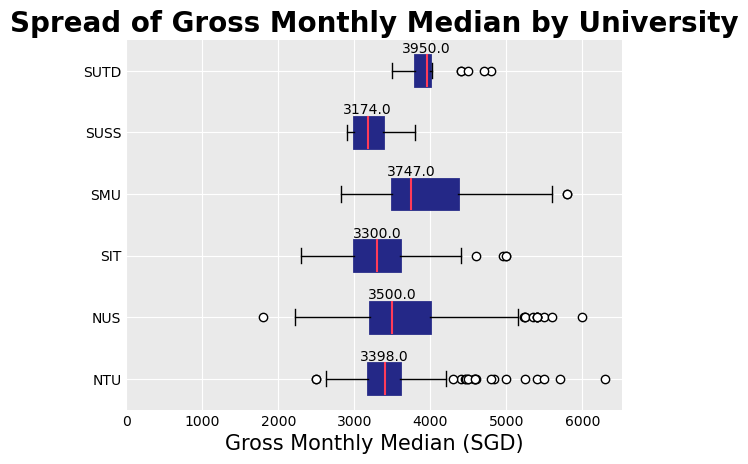

In [10]:
# BOXPLOT
# Create labels for the universities
labels = np.unique(d1['university'])

# Extracting data for the boxplot
d1_bp = d1[np.nonzero(d1['gross_monthly_median'])] # filter out rows where gross monthly median is na or 0
# d1_bp = d1_bp[d1_bp['year']==2021] # filter 2021 only

uni_and_wage = d1_bp[['university', 'gross_monthly_median']]
wages = uni_and_wage['gross_monthly_median']
all_wages = [] # all_wages will contain values to be used for the boxplot
for i in labels:
    all_wages.append(wages[d1_bp['university'] == i]) # for each uni, create an array of wages.
    
# Plot
fig, ax = plt.subplots()
medianprops = {"color": "#ff3b58", "linewidth": 1.5}
boxprops = {"facecolor": "#242887", "color": "#242887","linewidth": 2}
flierprops = {"markerfacecolor": "white"}
bp = ax.boxplot(all_wages,
            labels=labels,
            patch_artist=True,
            medianprops=medianprops,
            boxprops=boxprops,
            flierprops=flierprops,
            vert=False)

# Customize ax
ax.set_title("Spread of Gross Monthly Median by University", fontsize=20, fontweight='bold')
ax.set_xlabel('Gross Monthly Median (SGD)',fontsize=15)
ax.set_xticks(np.arange(0,7000,1000))

# Remove plot borders
ax.spines[:].set_visible(False) # removing all the spines

# Remove axis tick lines
ax.tick_params(length=0)

# Add gridlines
ax.grid(color='w')
ax.set_facecolor('#eaeaea')

# Adding median values above median line
for line in bp['medians']:
    # Get position of the median line
    x = line.get_xdata()[0] # get the middle of the line horizontally
    y = line.get_ydata()[1] # get the top of the line vertically
    # Use plt.text to add the median value. the median value is same as the x value
    plt.text(x, y, x,
         verticalalignment='bottom',horizontalalignment='center',fontsize=10)

plt.show()

In [1]:
def myfunction(value):
    value = value*10
    return value

print(myfunction(2))

20


In [2]:
for i in range(5):
    print(myfunction(i))


0
10
20
30
40


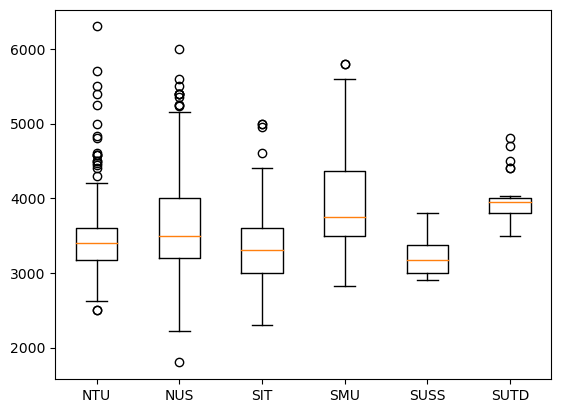

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# Create labels for the universities
labels = np.unique(d1['university'])

# Extracting data for the boxplot
d1_bp = d1[np.nonzero(d1['gross_monthly_median'])] # filter out rows where gross monthly median is na or 0
# d1_bp = d1_bp[d1_bp['year']==2021] # filter 2021 only

uni_and_wage = d1_bp[['university', 'gross_monthly_median']]
wages = uni_and_wage['gross_monthly_median']
all_wages = [] # all_wages will contain values to be used for the boxplot
for i in labels:
    all_wages.append(wages[d1_bp['university'] == i]) # for each uni, create an array of wages.
    
fig, ax = plt.subplots()
ax.boxplot(all_wages,labels=labels)

plt.show()


### Boxplot Analysis
From the boxplot above, we can see that the universities SUTD and SUSS have very little variability in their median wages. This is to be expected as there were significantly less degree programmes across all the years in these universities (28 and 22 respectively), which would result in lesser variability then a university like NUS and NTU which both offered 357 degree programmes across all the years.

- Looking at the 25th interquartile range of all the universities, they all generally hover around the SGD3000-3200 range. However, SUTD and SMU have much higher values for their 25th interquartile range of approximately SGD3800 and SGD3500 respectively. The purpose of looking at the lower interquartile range is to see the wages of "below average paying" degrees. From this data we can see that most of "below average paying" degrees have around the same wages with the exception of SUTD and SMU which have higher wages.

- Looking at the 75th interquartile range of all the universities, they vary quite a lot. The purpose of looking at the lower interquartile range is to see the wages of "above average paying" degrees. From this data we can see a big variation, but the universities from highest to lowest 75th interquartile wages are SMU, NUS, SUTD, SIT, NTU and SUSS.

- Looking at the median of all the universities, the "average paying" degrees are all between the SGD3000 and SGD4000 range. The univerisites from highest to lowest median wages are SUTD, SMU, NUS, NTU, SIT and SUSS.

With this information, students who have wages as a top priority in choosing universities and do not care so much about what they learn can determine which university to go to based on their performance. 
Generally, higher paying degrees are more competitive to enter. So if the student knows that they are not academically high performers but still want to choose a university that offers the best pay for their performance, they can choose SUTD or SMU which have a higher 25th interquartile range which suggests that the "below average paying" degrees there can give them the best pay out of all the universities. 
On the other hand, if a student knows they can qualify for a competitive degree, they could look at SMU or NUS which have a higher 75th interquartile range which suggests that the "above average paying" degrees there will give them the best pay out of all the universities.


**Do note that this is not suggesting discrimination between degrees. A "below average paying" degree is not necessarily a bad degree, nor is an "above average paying" degree necessarily a good degree, but from an objective standpoint of looking at wages of university graduates, these degrees simply offer these wages.*

Conclusion: The boxplot above is useful in getting a very high-level overview. However, the data varies greatly because different universities offer different degrees which obviously will result in different pay. For a more specific comparison, we should compare the gross median pay across universities using specific degrees.

# Analysis 2: Comparison of Gross Monthly Median by University (Line graph)

_Dataset: Graduate Employment Survey_

Students would factor in their pay after graduating when choosing their university. Hence, this analysis will help see if different university graduates get different pay. If so, the graphs will also help me to compare which university graduates tend to get better pay.
For the following graph, I will be using the Computer Science, Accountancy and Chemical Engineering degrees. These 3 degrees were picked as they were offered by the most universities which would allow me to include the most the unis in the comparison.


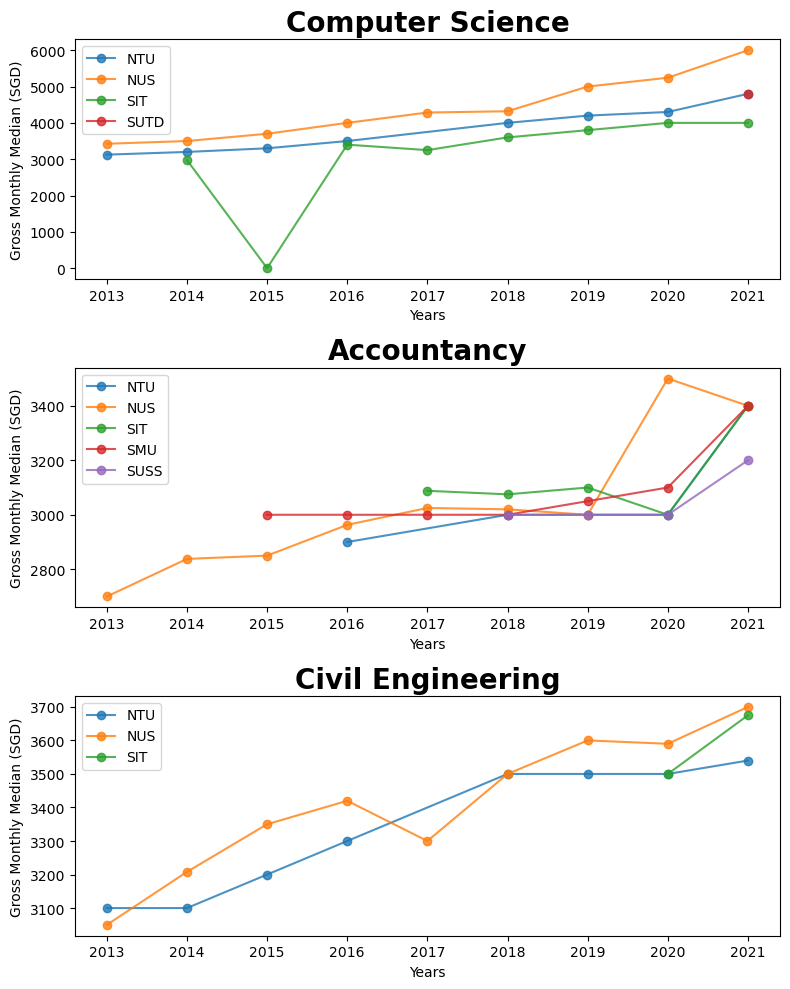

In [11]:
# *** Subsetting data for specifc degrees across all the universities ***

def get_rows_by_degree(degree, year):
    
    # Find the specifc name of each degree in each university
    
    d1_2021 = d1[d1['year']==year] # use rows from 2021 only. This is to remove duplicates from other years.     
    # Create array of rows that contain the degree
    d1_2021_degree = []
    try:
        for row in d1_2021:
            if degree in row['degree']:
                d1_2021_degree.append(row)
    except:
        print('No rows with that degree name found. Check the spelling of the degree name.')
    # Make d1_2021_degree into an ndarray with the same datatypes as d1
    d1_2021_degree = np.array(d1_2021_degree, dtype=d1.dtype) 
    
    # For degrees that come from the same school, take the first instance
    unique_uni = np.unique(d1_2021_degree['university'], return_index=True)[1] # this returns the unique uni names and their indices (return_index=True), i.e. [['NTU','NUS','SIT','SUTD'], [0,1,2,4]]
    d1_2021_degree = d1_2021_degree[unique_uni]
    
    # Get all the rows with the specified degree from each university
    for i in range(len(d1_2021_degree)):
        entry = d1[np.logical_and(d1['university'] == d1_2021_degree[i]['university'], d1['degree'] == d1_2021_degree[i]['degree'])] # Looks in original d1 dataset for all universities and degrees that match the specified degree names I extracted
        if i == 0: # for the first iteration, initialize the array with the first entry
            d1_degree = entry
        else:  # stack subsequent entries
            d1_degree = np.hstack((d1_degree,entry))
    return d1_degree

d1_compsci = get_rows_by_degree('Computer Science', 2021)
d1_acct = get_rows_by_degree('Accountancy', 2021)
d1_civeng = get_rows_by_degree('Civil Engineering', 2021)

# LINE CHART

# Creating the plots 
# https://stackoverflow.com/questions/68720116/creating-subplots-with-a-function-and-loop
   
def plot_lines(data, ax, degree): # basis is a column used for the basis of comparison e.g. 'gross_monthly_median'
    years = data['year']
    wage = data['gross_monthly_median']
    unis = np.unique(data['university'])

    for uni in unis:
#         uni = 'NTU' # use this to filter lines from a specific uni if needed
        years = data['year'][data['university'] == uni]
        wage = data['gross_monthly_median'][data['university'] == uni]
        ax.plot(years, wage, label=uni, **{'marker': 'o'}, alpha = 0.8)

    ax.legend(loc=2)
    ax.set_title(degree, fontdict={'fontsize':20,'fontweight':'bold'})
    ax.set_ylabel('Gross Monthly Median (SGD)')
    ax.set_xlabel('Years')

# Create 3 subplots   
fig, axes = plt.subplots(3, 1, figsize=(8,10))

# Loop through plots for each degree
degree_rows = [d1_compsci, d1_acct, d1_civeng]
degrees = ['Computer Science', 'Accountancy', 'Civil Engineering']
for i, ax in enumerate(axes):
    plot_lines(degree_rows[i], ax, degrees[i])
     
fig.tight_layout()
plt.show()

### Problem
Here, I encountered a problem whereby some universities did not offer equivalent degree programmes as others.

SUTD only offers 4 degree programmes which do not have equivalents across any of the other universities except for Computer Science, which was only offered in 2021. SMU and SUSS also only had Accountancy equivalents. SIT also only had a few equivalent degree programmes with the other universities. So on top of the analysis with the graph, I also came to realise that picking a university depends on the degree you want to pursue. SUTD, SMU, SUSS and SIT each offer few but very niche degrees that cannot be found in NTU and NUS, and this should hence be a factor in the decision of which university to enroll in.

### Line Plot Analysis
Looking past the problem, we can get information from the graphs themselves. Take note that the differences are exaggerated because the graphs do not start from 0. However this exaggeration helps us clearly see the differences. In all the graphs, the gross monthly median wage has trended upwards over the years. This could be due to inflationary pressure, but that isn't our focus here.

- From the Computer Science graph, we can see that the average NUS Computer Science graduate has consistently received higher pay then the average NTU Computer Science graduate, which has consistently received higher pay than the average SIT Computer Science and Game Design graduate. The only outlier is SIT 2015, however that is due to the SIT 2015 data being 'na' and thus resulting in a 0. This can be ignored.

- From the Accountancy graph, we see that the average Accountancy university graduate pay has fluctuated over the years. SMU graduates were the highest paid in 2016, SIT was the highest from 2017 to 2019, NUS suddenly spiked to the highest by a large margin at SGD3500 in 2020 and in 2021 NUS SMU and SIT all have the same median wage of SGD3400.

- From the Civil Engineering graph, we can see that the average NUS Civil Engineering graduate was generally paid more than the average NTU Civil Engineering graduate with the exception of the year 2017 where NTU was about SGD3400 while NUS dropped to about SGD3250

What we can derive from these graphs is that the university you go to does indeed affect your wage as all the graphs have distinct universities who's graduates were paid more. However, we can also see that only certain degrees have 1 university who's graduates get better paid consistently. As we saw from the Accountancy degree, the university with the highest median paid graduates fluctuates. However for the Computer Science and Civil Engineering degrees, NUS tended to have the highest paid graduates, followed by NTU and then SIT.

Conclusion: If a student is interested in the Computer Science or Civil Engineering degrees, NUS would be the ideal choice to maximise pay. However other universities may get better pay for different degrees such as Accountancy. Hence it is not just 1 university that is best paid across all the degrees.

###### A student who is concerned about maximising pay needs to look at the specific degree when picking their university. e.g. for Computer Science or Civil Engineering, NUS has the highest pay as it is not just 1 university that is best paid across all the degrees.

# Analysis 3: Employment by University (Histogram)

_Dataset: Graduate Employment Survey_

Students would want to pick a university that has been proven to have good employment rates as it shows career security.
For this analysis, I will only be looking at the Accountancy degree as it is offered by the most universities (except SUTD). This analysis will compare the employment rates for each University's graduates.

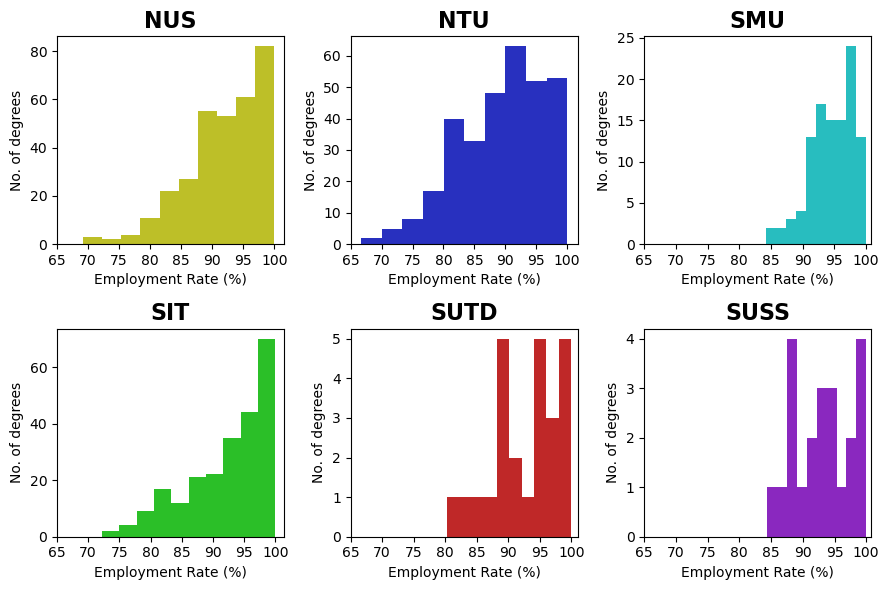

In [12]:
# Preparing data
employment_nonzero = d1[np.nonzero(d1['employment_rate_overall'])]
def get_employment_by_uni(uni):
    try: 
        uni_mask = employment_nonzero['university'] == uni
        rows_by_uni = employment_nonzero[uni_mask]
        employment_by_uni = rows_by_uni['employment_rate_overall']

        return employment_by_uni
    except:
        print('University name not found. Check the spelling of the university abbreviation.')

employment_NUS = get_employment_by_uni('NUS')
employment_NTU = get_employment_by_uni('NTU')
employment_SMU = get_employment_by_uni('SMU')
employment_SIT = get_employment_by_uni('SIT')
employment_SUTD = get_employment_by_uni('SUTD')
employment_SUSS = get_employment_by_uni('SUSS')

# Plot
def plot_hist(data, ax, uni, color):
    
    ax.hist(data, color=color)
    ax.set_title(uni,{'fontweight':'bold','fontsize':'16'})
    ax.set_ylabel('No. of degrees')
    ax.set_xlabel('Employment Rate (%)')
    ax.set_xticks(np.arange(65,101,5))
#     ax.set_yticks(np.arange(0,91,10))
    
fig, axes = plt.subplots(2,3,figsize=(9,6))
axes = axes.flatten()

colors=['#bdbf28','#2830bf','#28bdbf','#2bbf28','#bf2828','#8a28bf']

plot_hist(employment_NUS, axes[0], 'NUS', '#bdbf28')
plot_hist(employment_NTU, axes[1], 'NTU', '#2830bf')
plot_hist(employment_SMU, axes[2], 'SMU', '#28bdbf')
plot_hist(employment_SIT, axes[3], 'SIT', '#2bbf28')
plot_hist(employment_SUTD, axes[4], 'SUTD', '#bf2828')
plot_hist(employment_SUSS, axes[5], 'SUSS', '#8a28bf')

fig.tight_layout()    
plt.show()

*It is important to note that while the x-axis of the graphs have been standardised, the y-axis has not as standardising the y-axis will make the universities with less degrees (e.g. SUSS) have very short graphs. For this analysis, it is ok for the y-axes to not be standardised as we are looking at the employment rate with respect to the number of graduates within each uni.

### Analysis
The graphs show us the employment rates of degree graduates in each university. This is not exactly proportionate to the employment rate of the university as the number of students within each degree can vary a lot, but this can be used to get a rough gauge of employability of the students in the universities.
- In general, employment rates of degree holders are fairly high, with most degree graduates have an employment rate between 80% to 100%
- We see that the schools with more degrees (NUS, NTU, SIT) tend to have a lower minimum employment rate. This is to be expected as they have a wider variety of degrees, meaning there is a higher chance of having a degree that tends to be less employable.

The bulk of degrees fall into the following employment rates for each university. I have ranked them according to employment rate:
1. SIT: 93% - 100%, tending towards 100%
2. NUS: 90% - 100%, tending towards 100%
3. SMU: 92% - 100%, tending towards 98%
4. NTU: 83% - 100%, tending towards 90%
5. SUTD: 90% - 100%, spread evenly
6. SUSS: 88% - 100%, spread evenly

There are a few factors that could influence the employment rates:
- Universities' ability to nurture high performing students, making them employable
- Universities' reputation which employers favour, making their graduates employable
- Degrees offered tend to produce skills that are more versatile
- Degrees offered tend to produce skills that are sought after in the job market

Conclusion: Different universities do indeed have different employment rates, with SIT being the highest. However, this could be due to various factors and hence does not necessarily equate to a student joining SIT automatically being the most employable candidate vs other universities.

###### A student who is concerned about employment rates could consider joining SIT, NUS or SMU over the other universities

# Analysis 4: Graduation Rate of each University (Bar Chart)

_Dataset: Intake and Graduates by Institution_

As a student, there is the chance that you don't manage to score well enough to graduate from a university and you would thus want to choose a university that has a high graduation rate. Hence, I would like to find percentage of students who successfully graduate from each university to see the likelihood that a student fails to attain their degree.

I will be assuming that each degree takes 4 years to complete and hence use the intake of 2016 and the graduates of 2020. This assumption will not affect the analysis significantly as students that take more years e.g. 5 years to complete will simply be from the 2017 intake and graduate in 2022 or be in the 2016 intake and graduate in 2022.
- Example: 
- John enrols in a 5 year degree in 2016 he graduates in 2021
- Amy enrols in a 5 year degree in 2017 and she graduates in 2022
- Jack enrols in a 5 year degree in 2018 and graduates in 2023
- The intake in 2017 is 1 and the graduates of 2021 will also be 1. The intake in 2018 is 1 and the graduates of 2022 will also be 1. This will continue on for future students and hence it is as if they each took 4 years. 

This assumption is only valid because the intake and graduate numbers only change slightly between each year.

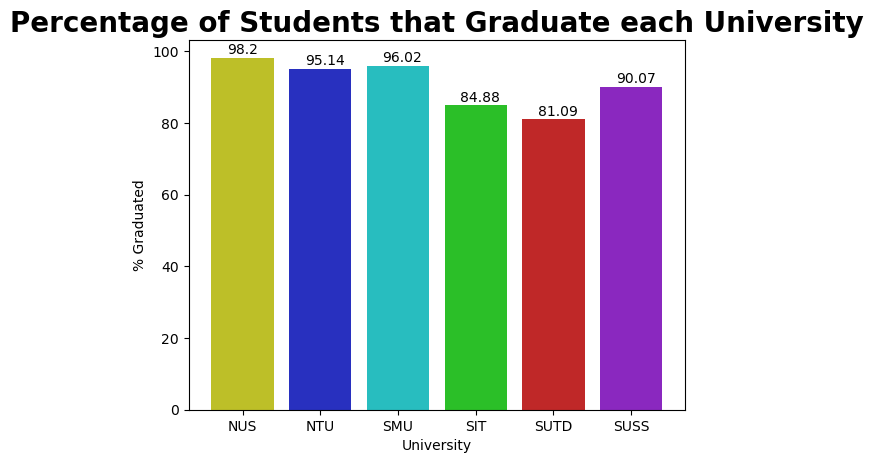

In [13]:
# Preparing data
# For this bar chart, only use intake of 2017 and graduates of 2021
unis = ['NUS','NTU','SMU','SIT','SUTD','SUSS']
intake_row = d2a[np.logical_and(d2a['year']==2016, d2a['sex']=='MF')]
intake_values = np.array(intake_row[0].tolist()[2:8])
grad_row = np.array(d2b[np.logical_and(d2b['year']==2020, d2b['sex']=='MF')])
grad_values = np.array(grad_row[0].tolist()[2:8])
percentage_grad = np.round(grad_values/intake_values*100,2)

# Plot
color=['#bdbf28','#2830bf','#28bdbf','#2bbf28','#bf2828','#8a28bf']
plt.title('Percentage of Students that Graduate each University',{'fontsize':20, 'fontweight':'bold'})
plt.xlabel('University')
plt.ylabel('% Graduated')
plt.bar(unis, percentage_grad, color=color)

# Show values on top of the bars
for index, value in enumerate(percentage_grad):
    plt.text(index-0.2, value+1, str(value))
    
plt.show()

### Analysis

From the bar chart, we can see that there is actually a fairly signifiant difference in graduation rates across the universities. NUS has the highest graduation rate of 98.20%, followed by SMU at 96.02%, NTU at 95.14%, SUSS at 90.07%, SIT at 84.88% and SUTD at 81.09%. This means that there is the highest likelihood of a student who is accepted into NUS to graduate. Thus, if a student is worried about graduating and wants a higher guarantee of graduation, NUS would be a good option.

However, there may be a few factors contributing to the likelihood of a student graduating. 

**School Factors**
- The school's ability to push students to perform well to graduate
- Low graduation/passing criteria in the university
- Low graduation/passing criteria of degrees

Such school factors would allow any student who enters the school to have a good chance of graduating

**Individual Factors**
- Quality of students that enter the university. (Certain universities are competitive to qualify for, resulting in better performing students entering those schools, meaning the students will work hard and have higher graduation rates)

Such individual factors would mean that it is not exactly the school that helps the student to graduate, but rather the tendency for high performers to enrol in that school and thus boost the graduation rates. 

In summary, the most favourable universities in terms of graduation rates are:
1. NUS  (98.20%)
2. SMU  (96.02%)
3. NTU  (95.14%)
4. SUSS (90.07%)
5. SIT  (84.88%)
6. SUTD (81.09%)

Conclusion: The university with the highest graduation rate is NUS with 98.2%, making if the most favourable if you fear that you cannot perform well enough to graduate. However, a school having a high graduation rate does not necessarily mean that you will graduate as individual merit still matters.

###### A student who is concerned about graduation rates could consider joining NUS, SMU or NTU over the other universities

# Analysis 5: Popularity of Courses (Pie Chart)

_Dataset: Universities - Intake, Enrolment and Graduates by Course_

Another factor students could consider is how popular a course is among certain genders as well as in general. It can be helpful to see what fellow male or fellow female students are choosing to help in your own decision. Hence, I will be analysing the popularity of each course. This analysis will look at the number of graduates from each course across all Singapore universities.

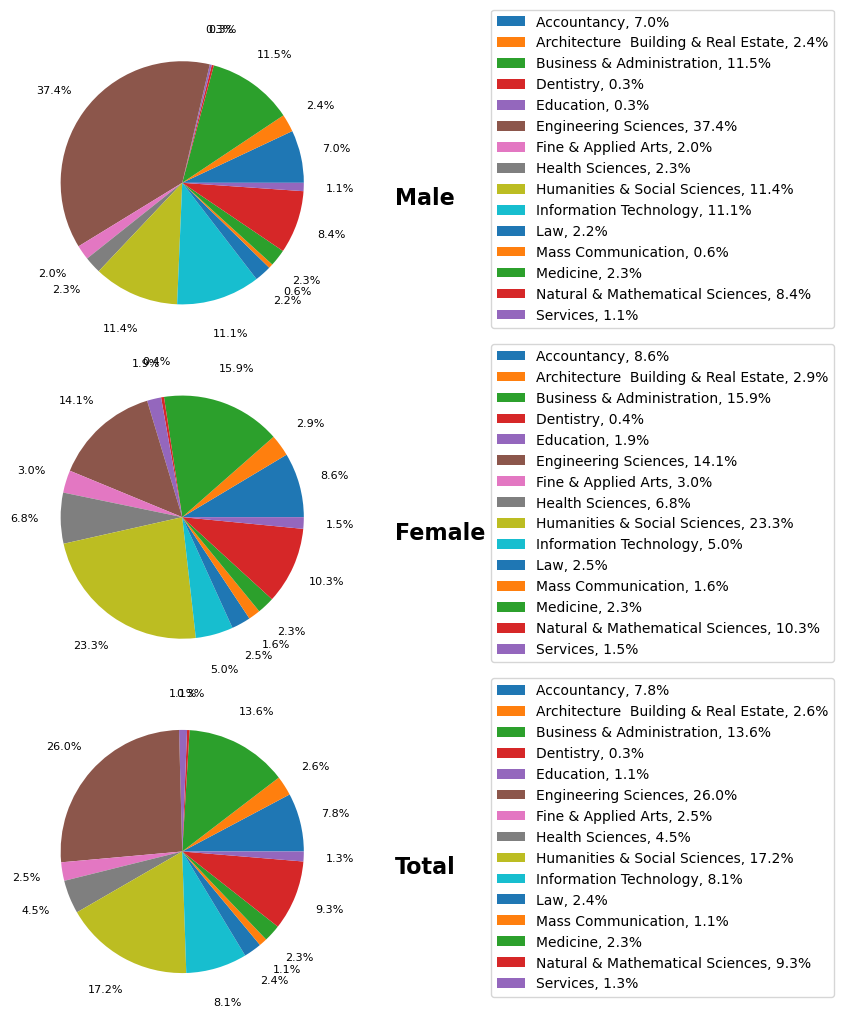

In [14]:
fig, axes = plt.subplots(3,1, figsize=(10,10))

def plot_pie(data, labels, ax):
    ax.pie(data, autopct='%1.1f%%', pctdistance=1.3, radius=3, textprops={'fontsize': 8}) # some percentages are overlapping, but they have also been shown in the legend
    title = cols[i]
    ax.set_title(title, {'fontsize':16, 'fontweight':'bold'}, loc='left', x=2.6, y=0.2)
    pctges = data/data.sum()*100
    labels = [f'{l}, {p:0.1f}%' for l, p in zip(labels, pctges)]
    ax.legend(labels, loc='lower right', bbox_to_anchor=(7, -1))

cols = ['Male','Female','Total']
labels = d3['course'][::2]
for i, ax in enumerate(axes):
    if cols[i] == 'Male':
        arr = d3_m[:,2]
    elif cols[i] == 'Female':
        arr = d3_f[:,2]
    else:
        arr = d3_mf[:,2]
    plot_pie(arr, labels, axes[i])
    
plt.subplots_adjust(hspace=2.3)
    
plt.show()
# plt.tight_layout()

### Analysis

From this analysis, we can pick out some of the more popular courses per gender and in total

- For males, Engineering Sciences is the most popular course which makes up 37.4% of male graduates. This is followed by Business & Administration with 11.5%.
- For females, Humanities & Social Sciences is the most popular course which makes up 23.3% of female graduates. This is followed by Business & Administration with 15.9%.
- In total, Engineering Sciences is the most popular course with 26.0% of the graduate population, followed by Humanities & Social Sciences with 17.2% of the graduate population.

With this data, we can see the more popular choices for male and female students in terms of courses. Males tend to have certain strengths or interests that are common amongst other males, while females tend to have certain strengths or interests that are common amongst other females. This is due to both biological reasons and upbringing. Hence, if a male student is not so sure of what he is interested in, he could consider courses that other males are typically interested in. From this graph, males could consider Engineering Sciences. On the other hand, females could consider Humanities & Social Sciences. Interestingly, Business Administration is the second most popular course for both genders which suggests that there are some courses that are somewhat gender neutral.

Conclusion: Different courses are different in popularity for each gender.

###### Male students who have no idea what they are interested in could consider Engineering Sciences or Business Administration, whereas female students could consider degrees in the Humanities & Social Sciences or Business Administration.

# Analysis 6: Wage against difficulty of qualifying for a degree (IGP)

_Datasets: Graduate Employment Survey, NUS Indicative Grade Profile_

In order for a student to consider a university and degree, they must first be able to qualify for it. I will be using the IGP for the degree as a quantifier for difficulty of qualifying for the degree. Hence, we will see how wage and IGP difficulty of qualifying relate using a scatter plot. We will get the wage data from dataset 1 (ges.csv).

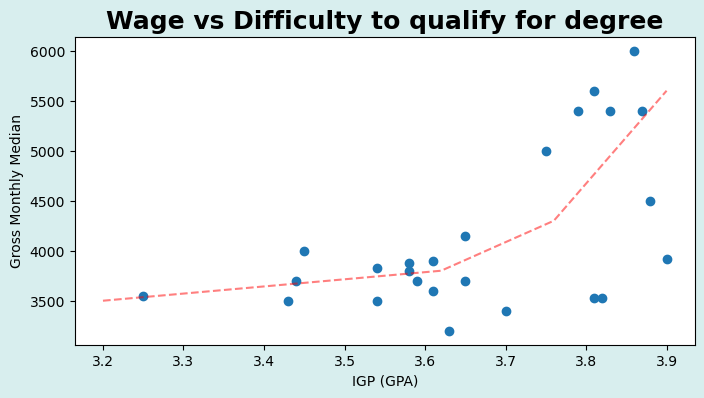

In [15]:
# Data preparation
# This will be tedious as all the degree names and orders are different in both sheets. Hence I have to manually link the degree name in the IGP to the degree name in the GES.
d1_NUS_2021 = np.copy(d1[np.logical_and(d1['year'] == 2021, d1['university'] == 'NUS')]) # use only NUS 2021 data
d1_NUS_degreelist = ['Bachelor of Laws',  
'Bachelor of Medicine and Bachelor of Surgery',
'Bachelor of Science (Nursing)',
'Bachelor of Dental Surgery',
'Bachelor of Arts (Architecture)',
'Bachelor of Arts (Industrial Design)',
'Bachelor of Science (Project and Facilities Management)',
'Bachelor of Science (Real Estate)',
'Bachelor of Engineering (Biomedical Engineering)',
'Bachelor of Engineering (Chemical Engineering)',
'Bachelor of Engineering (Civil Engineering)',
'Bachelor of Engineering (Electrical Engineering)',
'Bachelor of Engineering (Environmental Engineering)',
'Bachelor of Engineering (Engineering Science)',
'Bachelor of Engineering (Industrial and Systems Engineering)',
'Bachelor of Engineering (Materials Science and Engineering)',
'Bachelor of Engineering (Mechanical Engineering)',
'Bachelor of Science (Business Analytics)',
'Bachelor of Computing (Computer Science)',
'Bachelor of Computing (Information Security)',
'Bachelor of Computing (Information Systems)',
'Bachelor of Engineering (Computer Engineering)',
'Bachelor of Science (Pharmacy)',
'Bachelor of Science',
# 'Bachelor of Science (Computational Biology)',
'Bachelor of Science',
'Bachelor of Science',
'Bachelor of Science',
'Bachelor of Business Administration',
'Bachelor of Business Administration (Accountancy)',
'Bachelor of Arts',
'Bachelor of Environmental Studies',
]
# Function to get all gross monthly medians of the above NUS degrees in 2021 from GES
def get_wages(arr):
    wages = []
    for degree in arr:
        mask = d1_NUS_2021['degree'] == degree
        d1_row = d1_NUS_2021[mask]
        wage = d1_row['gross_monthly_median']
        wages.append(wage)

    return wages

wages = get_wages(d1_NUS_degreelist)
wages = np.array(wages)
wages = wages[:,0]
igps = d4['10th_percentile'] # for IGP we will just look at the 10th percentile since that indicates the GPA required to qualify for the degree and we are looking at qualifying only

# Remove rows in wages where the IGP is blank
for i in range(len(blank_igp)): # blank_igp was already created above when importing the dataset
    wages = np.delete(wages, blank_igp)
    
# Remove rows in wages and igps where wages are blank
blank_wages = np.where(wages == 0)
for i in range(len(blank_wages)):
    igps = np.delete(igps, blank_wages)
    wages = np.delete(wages,blank_wages)

fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(igps, wages)
ax.set_xlabel('IGP (GPA)')
ax.set_ylabel('Gross Monthly Median')
ax.set_title('Wage vs Difficulty to qualify for degree', fontsize=18, fontweight='bold')
fig.set_facecolor('#d8eeee')

linex = np.linspace(3.2, 3.9, 6)
liney = [3500, 3600, 3700, 3800, 4300, 5600]
ax.plot(linex, liney, 'r--', label='Trend', alpha=0.5)
plt.show()

### Analysis

The scatter plot shows a general trend of gross monthly median increasing as IGP (GPA) increases. However, there are many outliers. 
- The degree with the lowest gross monthly median is actually within the 3.6 gpa range. 
- Some degrees within the 3.8 and 3.9 range also have a relatively low pay of about SGD3500+. This was surprising to me as I expected a fairly uniform and proportionate increase between IGP and gross monthly median. 
- Majority of the degrees seem to fall under the SGD3000 - SGD4500 range, with a handful of degrees above SGD5000.

Conclusion: Generally, as wage prospects increase, the difficulty to qualify for the degree also increases. However there are a few exceptions.

###### Students who have high pay as a priority must also take into consideration their academic ability. Students with lower/moderate GPA could consider degrees that have higher pay than their counterparts within the lower/moderate GPA ranges such as Architecture (3.45 GPA, SGD4000) or Engineering (3.65 GPA, SGD4150).

# Compilation of Analyses

With all our data analysed, let us revisit our problem statement.

### Overarching Problem Statement: Which university and degree should a student pick?

This problem statement was split into 2 questions that I wanted to answer, and here is how the analyses we conducted answers these questions.

### 1. Which university and degree graduates have the best immediate career prospects?

- Our first analysis gave us a **high level overview of Gross Monthly Median by University using the Boxplot**, while the second analysis zoomed into **3 specific courses to compare Gross monthly Medians across Universities using Line Graphs**. From these analyses, we learned that a student who is concerned about **maximising pay** needs to **look at the specific degree when picking their university** as it is not just 1 university that is best paid across all the degrees.

- Our third analysis looked at **Employment by University using Histograms**. From this analysis, we learned that a student who is concerned about **employment rates** could consider joining **SIT, NUS or SMU** over the other universities as these universities tend to have higher employment rates.

### 2. Which universities and degrees are realistic based on a student's ability/preferences?

- Our fourth analysis examined the **Graduation Rate of Universities using a Bar Chart**. From this analysis, we learned that a student who is concerned about **not being able to graduate** could consider joining **NUS, SMU or NTU** over the other universities as these universities tend to have higher graduation rates.

- Our fifth analysis was about **Popularity of Courses using a Pie Chart**. From this analysis, we learned that a student who have no idea what degree to pick can consider taking courses that students similar to them are taking. **Male students could consider Engineering Sciences or Business Administration, whereas female students could consider degrees in the Humanities & Social Sciences or Business Administration.**

- Our sixth analysis showed the relationship between **Wage vs Difficulty to Qualify for a Degree**. The difficulty of qualifying was quantified using IGP. From this analysis, we learned that students who have high pay as a priority must also take into consideration their academic ability. **Students with lower/moderate GPA could consider degrees that have higher pay than their counterparts within the lower/moderate GPA ranges such as Architecture or Engineering.**


# Recommendation
With all this information, we can answer our scenario whereby a male student is completely unsure of what degree and university to pick. The student does not have any particular interests, but wants guaranteed employment with the highest possible pay. He is slightly worried about not being able to graduate as his performance in school is slightly above average with a GPA of around 3.6. In this case, I would recommend the student to take Engineering in NUS. Considering the student's GPA of 3.6, the course that offers a the highest gross monthly median at that GPA point is Engineering with SGD4150 at a GPA of 3.65. NUS very high employment rate compared to most the other universities. NUS also has the highest graduation rate. The Engineering degree is also the most popular degree among male students. Hence, I would recommend Engineering in NUS.

# Conclusion
To conclude, this report helps look at various factors that contribute to the decision of student picking a university and degree. These factors include pay, employment, past graduation rates, popularity of courses and difficulty of enrolling into a degree. We have seen an example of how a student can use this information to choose a university and degree. However, a student should also go beyond these statistics and consider their personal interests as well as travel distance when picking a university and degree.